### Bunch of plots

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_word_value_barplot(words, values, title):
    plt.figure(figsize=(10, 6))
    plt.bar(words, values, color='skyblue')

    plt.xlabel("Words")
    plt.ylabel("Values")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [6]:
words = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']
words_unknown = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'unknown', 'up', 'yes']

values_10 = [472, 475, 471, 475, 472, 474, 474, 476, 475, 476]
values_10UB = [472, 475, 471, 475, 472, 474, 474, 476, 409, 475, 476]
values_10U = [472, 475, 471, 475, 472, 474, 474, 476, 8208, 475, 476]

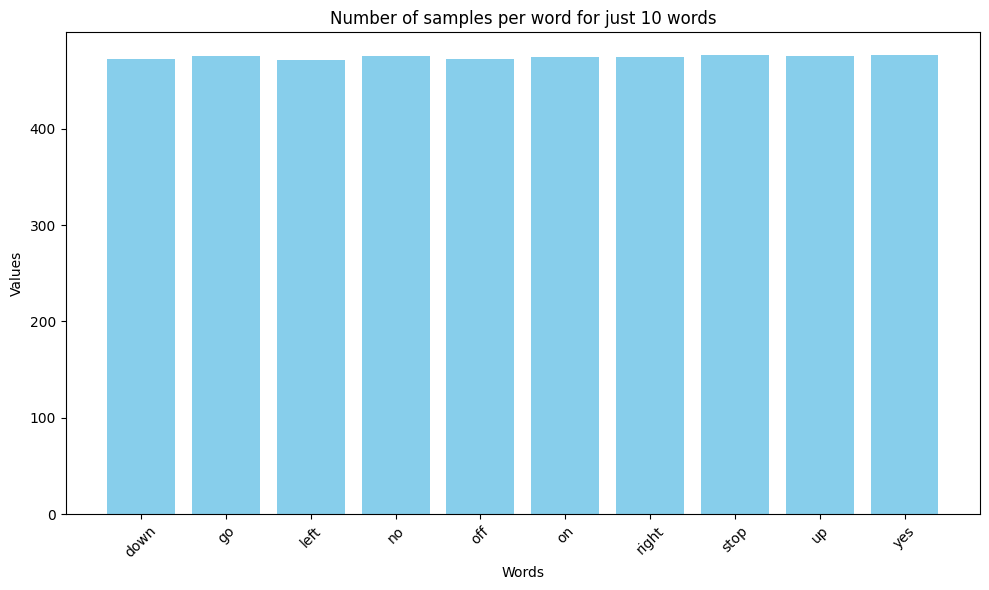

In [8]:
create_word_value_barplot(words, values_10, "Number of samples per word for just 10 words")

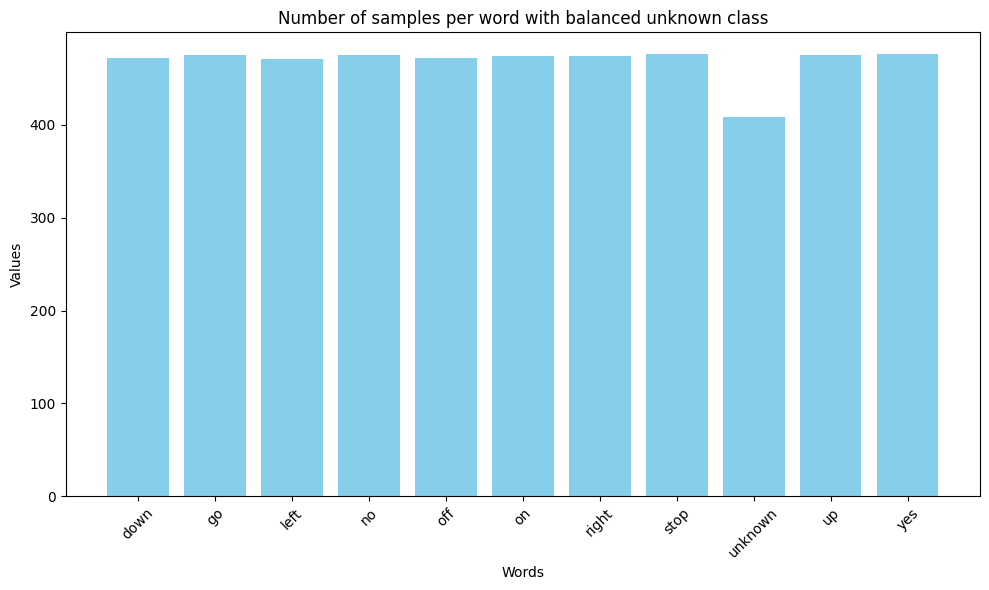

In [9]:
create_word_value_barplot(words_unknown, values_10UB, "Number of samples per word with balanced unknown class")

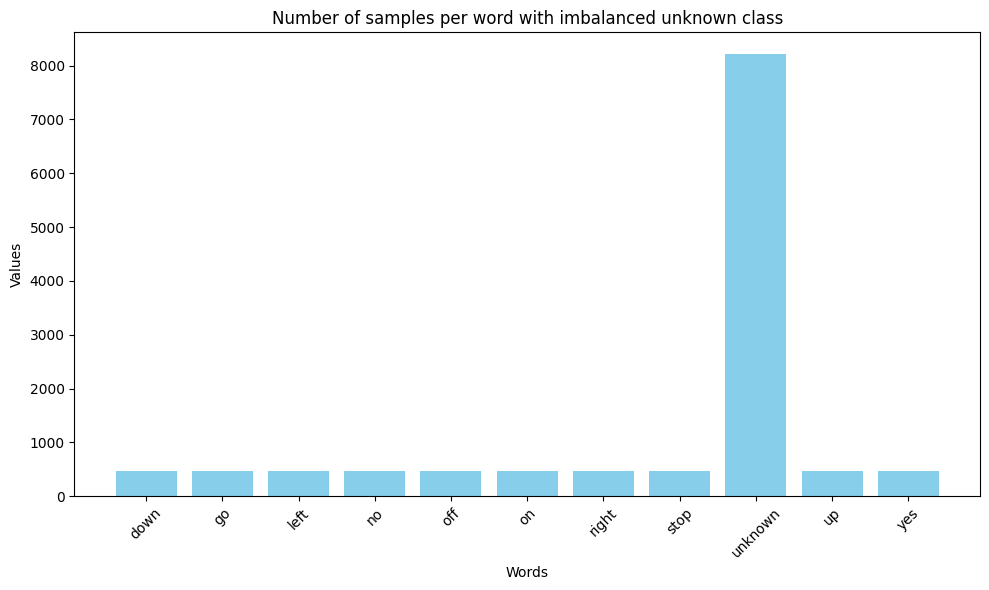

In [10]:
create_word_value_barplot(words_unknown, values_10U, "Number of samples per word with imbalanced unknown class")

In [15]:
accuracies = [96.48, 91.98, 88.21]
f1_scores = [96.48, 92.31, 88.47]
classes = ['just words', 'balanced unknown' , 'imbalanced unknown']

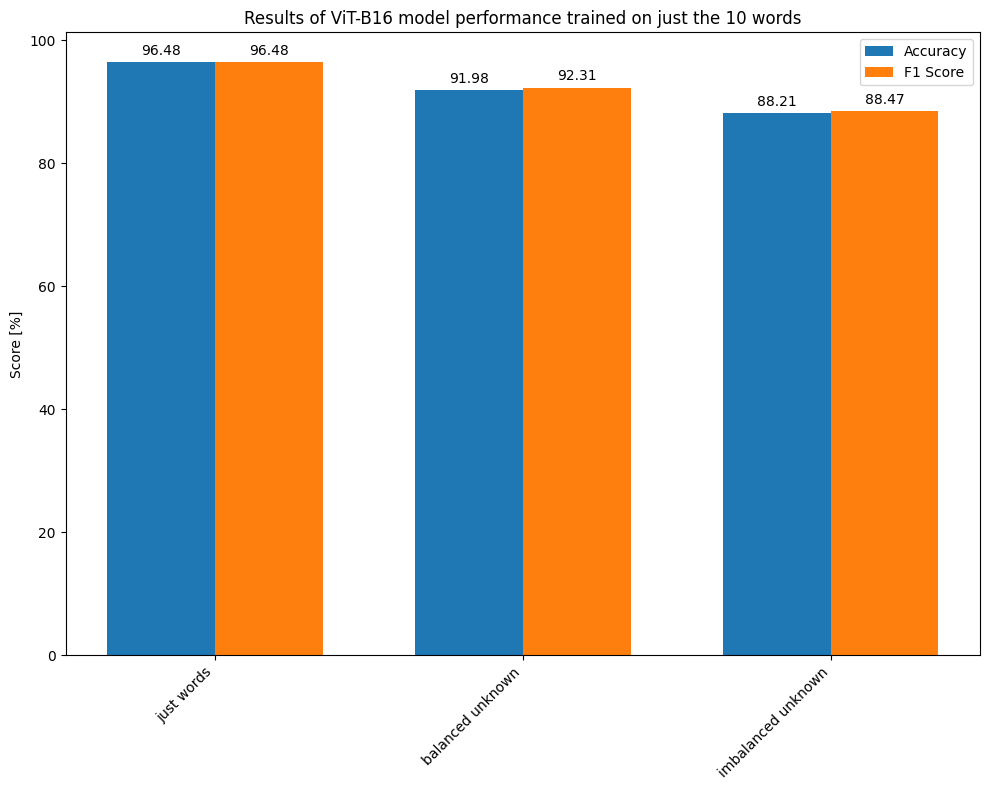

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.35
x = np.arange(len(classes))

bar1 = ax.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='#1f77b4')
bar2 = ax.bar(x + bar_width/2, f1_scores, bar_width, label='F1 Score', color='#ff7f0e')

ax.set_ylabel('Score [%]')
ax.set_title('Results of ViT-B16 model performance trained on just the 10 words')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [22]:
accuracies_B = [95.97, 96.77, 97.22, 96.79]
accuracies_S = [94.98, 96.05, 96.90, 96.98]
lrs = [0.00001, 0.00003, 0.0001, 0.0003]

In [38]:
def format_lr(lr):
    return '{0:.5f}'.format(lr).rstrip('0').rstrip('.') if '.' in '{0:.5f}'.format(lr) else '{0:.5f}'.format(lr)

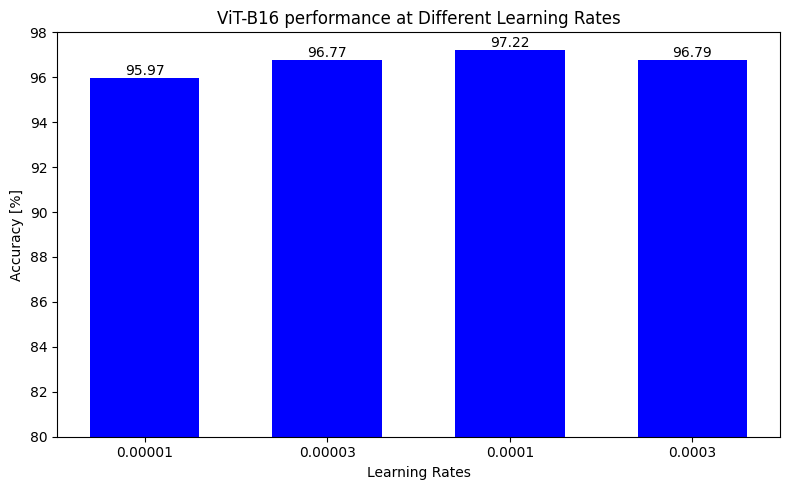

In [44]:
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(lrs)), accuracies_B, color='blue', width=0.6)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy [%]')
plt.title('ViT-B16 performance at Different Learning Rates')
plt.xticks(range(len(lrs)), [format_lr(lr) for lr in lrs])
plt.ylim(80, 98)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

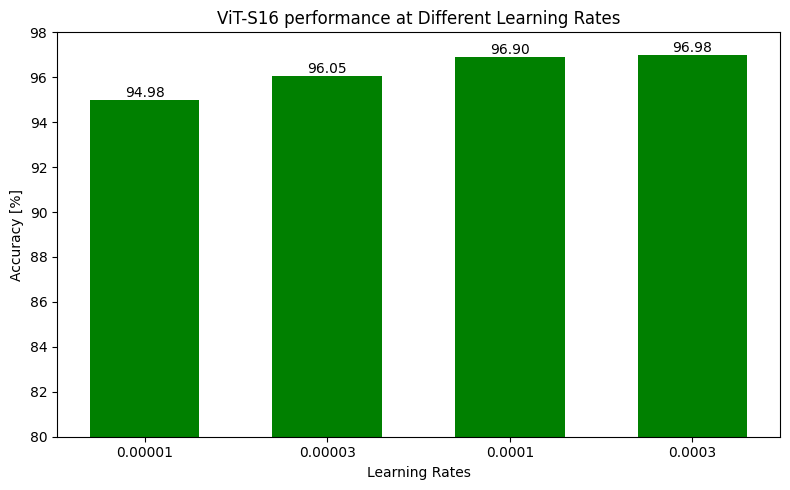

In [45]:
plt.figure(figsize=(8, 5))
bars = plt.bar(range(len(lrs)), accuracies_S, color='green', width=0.6)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy [%]')
plt.title('ViT-S16 performance at Different Learning Rates')
plt.xticks(range(len(lrs)), [format_lr(lr) for lr in lrs])
plt.ylim(80, 98)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

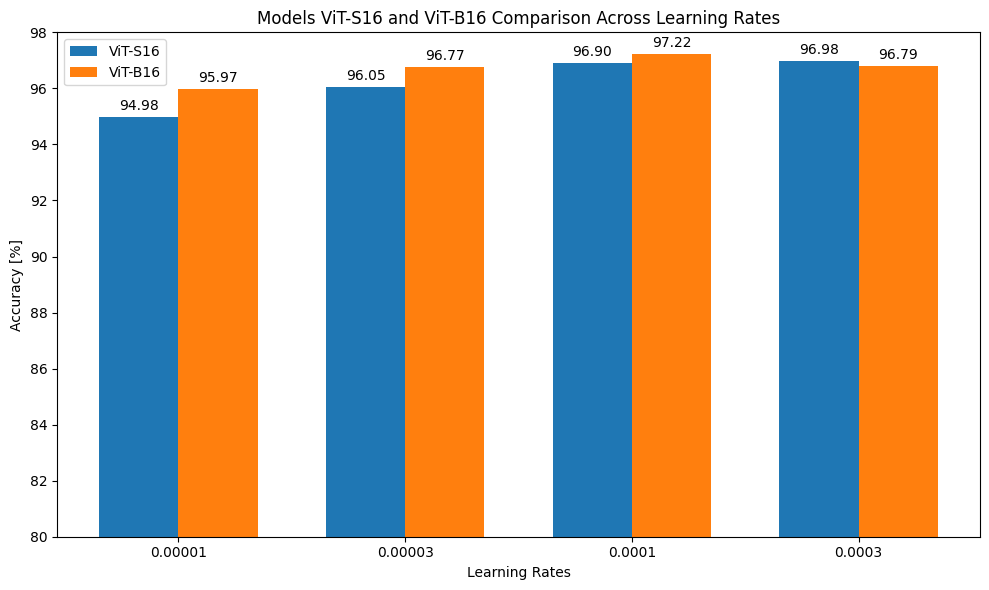

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(lrs))

lr_labels = [f"{lr:.5f}".rstrip('0').rstrip('.') if '.' in f"{lr:.5f}" else f"{lr:.5f}" for lr in lrs]

bar_S = ax.bar(x - bar_width/2, accuracies_S, bar_width, label='ViT-S16', color='#1f77b4')
bar_B = ax.bar(x + bar_width/2, accuracies_B, bar_width, label='ViT-B16', color='#ff7f0e')

ax.set_xlabel('Learning Rates')
ax.set_ylabel('Accuracy [%]')
ax.set_title('Models ViT-S16 and ViT-B16 Comparison Across Learning Rates')
ax.set_xticks(x)
ax.set_xticklabels(lr_labels)
ax.legend()

for bars in [bar_S, bar_B]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.ylim(80, 98)
plt.tight_layout()
plt.show()